process of converting industrial load profiles into regional yearly profiles is,
first convert load profiles to yearly times series based on months because here we have months rather than seasons or temperatures
cum all sector for load sum
scale it to total industrial demand 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate hourly timestamps for one year (2013)
timestamps_2013 = pd.date_range(start='2019-01-01', end='2019-12-31 23:00:00', freq='H')

# Create a DataFrame to hold these timestamps
df_yearly_industry = pd.DataFrame({'timestamp': timestamps_2019})

# Determine month and day_type (weekdays=0, Saturday=1, Sunday=2)
df_yearly_industry['month'] = df_yearly_industry['timestamp'].dt.month
df_yearly_industry['day_of_week'] = df_yearly_industry['timestamp'].dt.dayofweek
df_yearly_industry['day_type'] = df_yearly_industry['day_of_week'].apply(lambda x: 0 if x < 5 else (1 if x == 5 else 2))

# Assign hour (1-24)
df_yearly_industry['hour'] = df_yearly_industry['timestamp'].dt.hour + 1

# Merge with the industrial load profile based on month, day_type, and hour
df_final_industry = pd.merge(
    df_yearly_industry,
    df_industry,
    on=['month', 'day_type', 'hour'],
    how='left'
)

# Drop unnecessary columns for clarity
df_final_industry.drop(columns=['day_of_week'], inplace=True)

# Display the first few rows of the final profile


In [ ]:
# scaling to total load of 512TWh and distributing to regions
# Re-load the combined load profiles CSV file after environment reset
file_path_combined = '/mnt/data/combined_load_profiles.csv'
df_combined = pd.read_csv(file_path_combined, parse_dates=['timestamp'])


# Compute the scaling factor to scale the total sum_load to 512 TWh (or 512,000,000 MWh)
desired_total_load = 512_000_000  # in MWh
current_total_load = df_combined['sum_load'].sum()
scaling_factor = desired_total_load / current_total_load

# Scale the load_sum column
df_combined['heat_demand MWh'] = df_combined['sum_load'] * scaling_factor

# CO2 emissions for each region (in tons/year)
co2_emissions = {
    'DE9': 19521599,
    'DEA': 60084172,
    'DE2': 19834246,
    'DEE': 21587107
}

# Compute the total CO2 emissions
total_co2 = sum(co2_emissions.values())
# Create new columns for each region, scaling based on their share of CO2 emissions
for region, co2 in co2_emissions.items():
    fraction = co2 / total_co2
    df_combined[f'heat_demand_{region} MWh'] = df_combined['heat_demand MWh'] * fraction

# Save the updated dataframe to a new CSV file
output_file = '/mnt/data/combined_industry_profiles_scaled_512TWh_with_CO2_distribution.csv'
df_combined.to_csv(output_file, index=False)

output_file


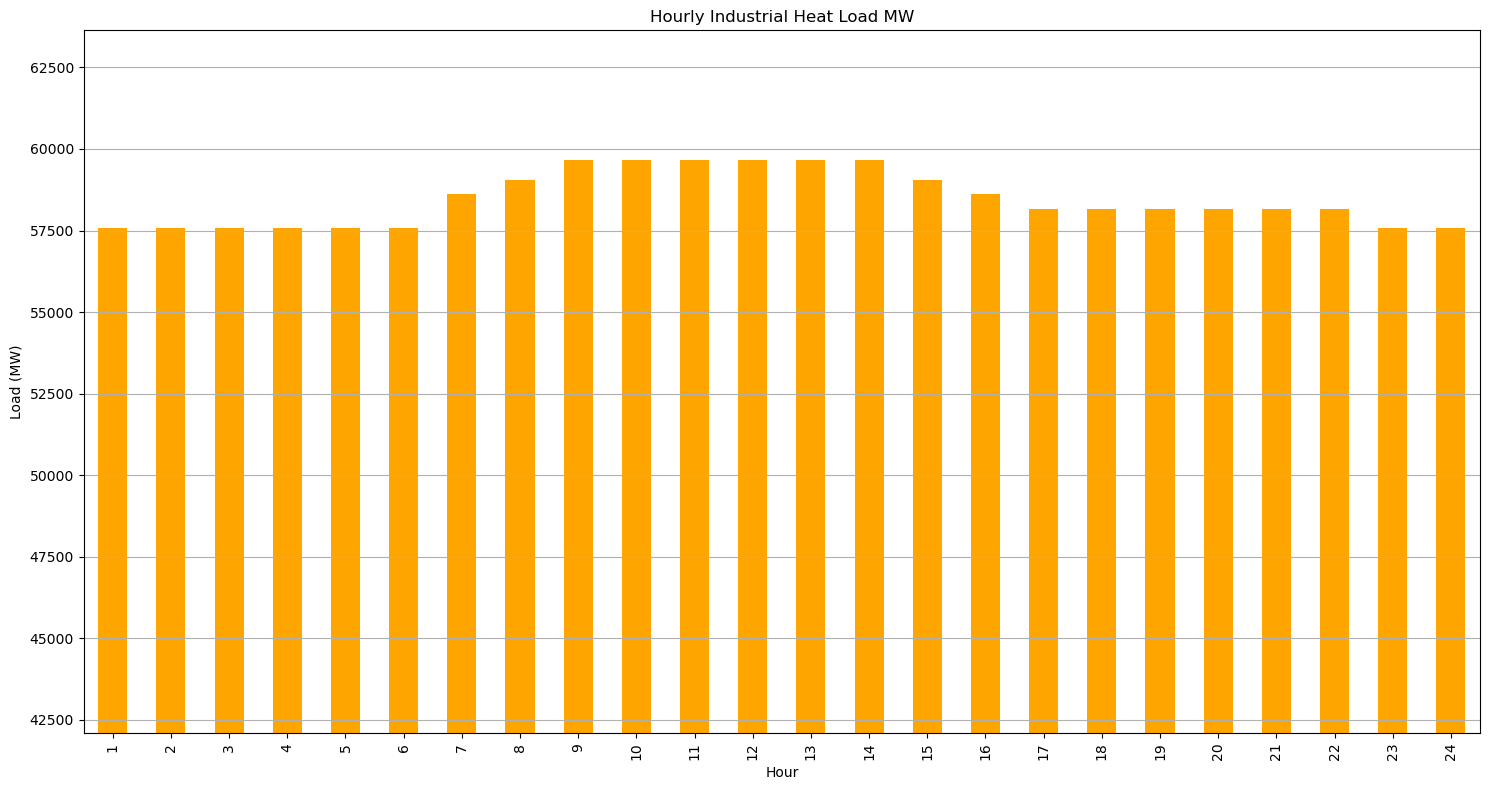

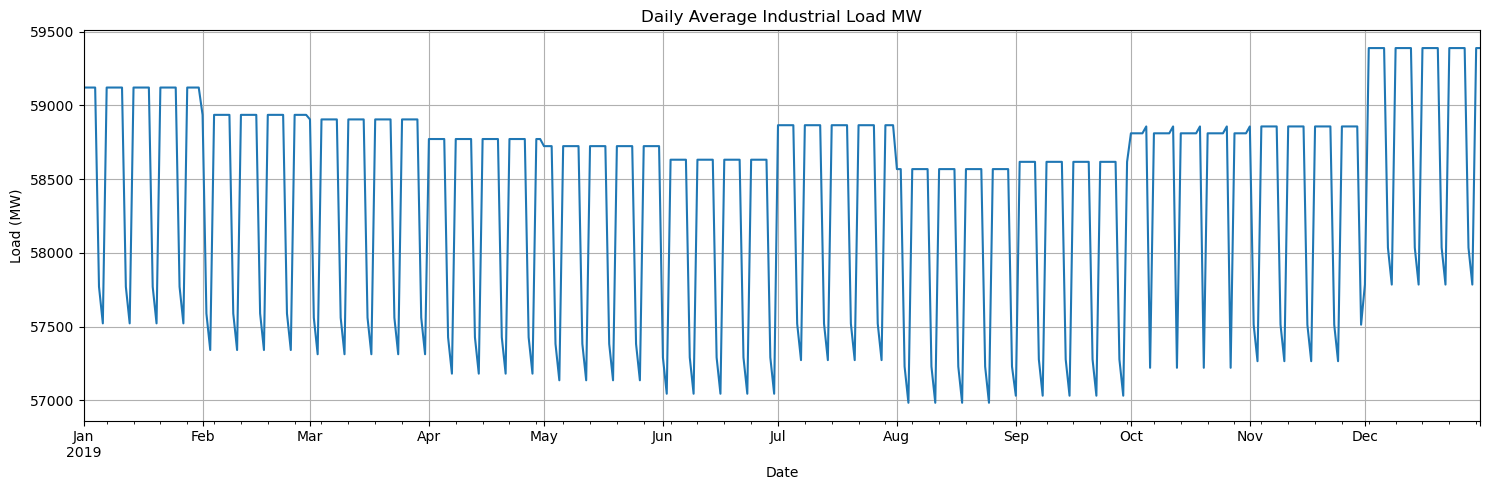

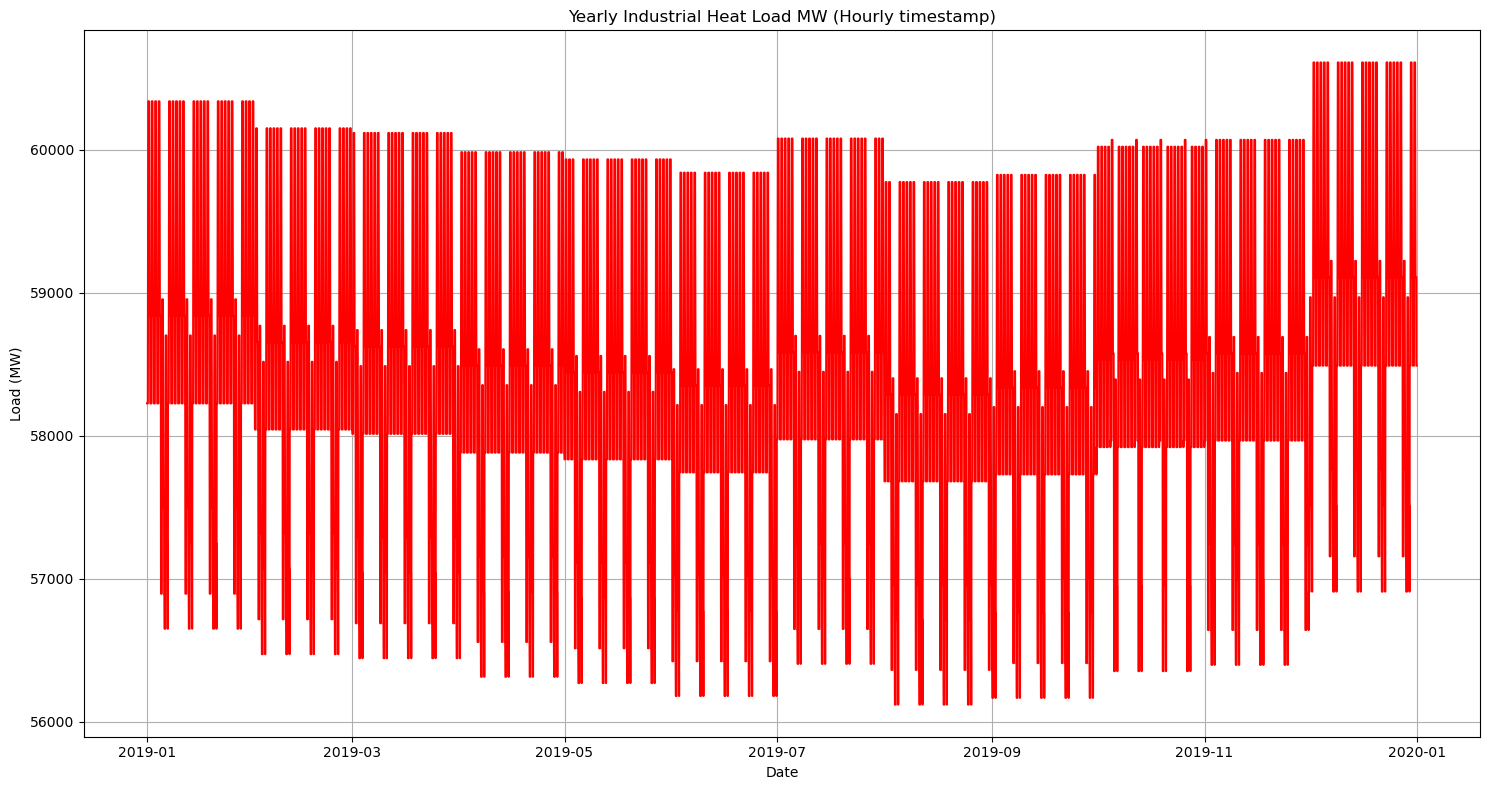

In [16]:
# residential profiles for cooling other heating and space water are done inthe upper two blocks, here is some visualization


# Load the combined load profiles data
file_path_combined = "C:/Users/86435/project_h2/data/heat_demand/industry/combined_indurtrial_demand.csv"  # Change path if needed
df_combined = pd.read_csv(file_path_combined, parse_dates=['timestamp'])


# Plot average industrial heat by hour
plt.figure(figsize=(15, 8))
df_combined.groupby('hour')['heat_demand MWh'].mean().plot(kind='bar', color='orange')
plt.title('Hourly Industrial Heat Load MW')
plt.xlabel('Hour')
plt.ylabel('Load (MW)')

# Adjust y-axis range to focus on the small differences
min_load = df_combined['heat_demand MWh'].min() * 0.75
max_load = df_combined['heat_demand MWh'].max() * 1.05
plt.ylim(min_load, max_load)

plt.grid(axis='y')
plt.tight_layout()
# plt.show()


# Plot daily average industrial heat over the year
df_combined.set_index('timestamp', inplace=True)
daily_avg = df_combined['heat_demand MWh'].resample('D').mean()

plt.figure(figsize=(15, 5))
daily_avg.plot()
plt.title('Daily Average Industrial Load MW')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.tight_layout()
# plt.show()


# Plot hourly industrial heat for the whole year
plt.figure(figsize=(15, 8))
plt.plot(df_combined.index, df_combined['heat_demand MWh'], color='red')
plt.title('Yearly Industrial Heat Load MW (Hourly timestamp)')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.tight_layout()
# plt.show()



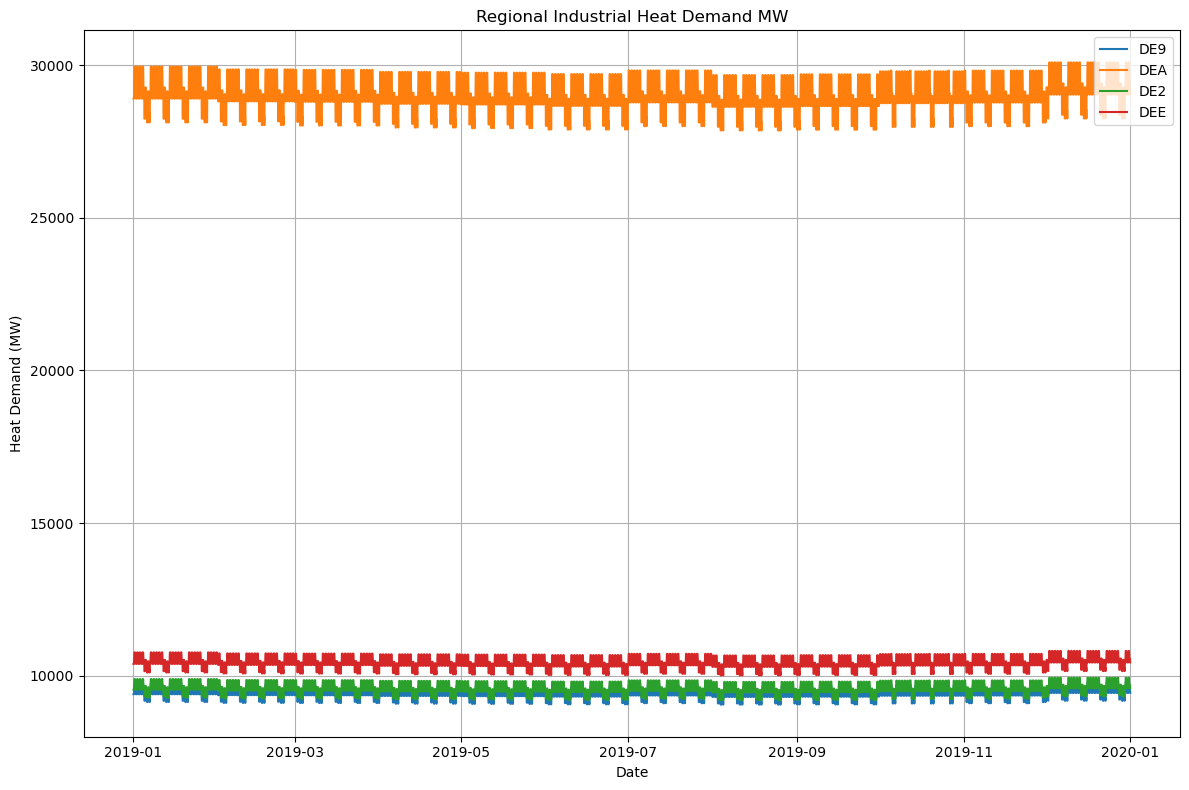

In [20]:

# Load the combined load profiles data
file_path_combined = "C:/Users/86435/project_h2/data/heat_demand/industry/regional_industry_heat_demand.csv"  # Change path if needed
df_regional = pd.read_csv(file_path_combined, parse_dates=['snapshot'])


# Plot all four regional columns in one plot with correct column names
plt.figure(figsize=(12, 8))
plt.plot(df_regional['snapshot'], df_regional['DE0 9'], label='DE9')
plt.plot(df_regional['snapshot'], df_regional['DE0 A'], label='DEA')
plt.plot(df_regional['snapshot'], df_regional['DE0 2'], label='DE2')
plt.plot(df_regional['snapshot'], df_regional['DE0 E'], label='DEE')

plt.title('Regional Industrial Heat Demand MW')
plt.xlabel('Date')
plt.ylabel('Heat Demand (MW)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:

file_path_combined = "C:/Users/86435/project_h2/data/heat_demand/industry/regional_industry_heat_demand.csv"  # Change path if needed
df_regional = pd.read_csv(file_path_combined, parse_dates=['snapshot'])

In [5]:
df_regional.set_index = df_regional['snapshot']

In [7]:
df_regional

,snapshot,DE0 9,DE0 A,DE0 2,DE0 E
0,2019-01-01 00:00:00,9391.792663,28906.34552,9542.206356,10385.50342
1,2019-01-01 01:00:00,9391.792663,28906.34552,9542.206356,10385.50342
2,2019-01-01 02:00:00,9391.792663,28906.34552,9542.206356,10385.50342
3,2019-01-01 03:00:00,9391.792663,28906.34552,9542.206356,10385.50342
4,2019-01-01 04:00:00,9391.792663,28906.34552,9542.206356,10385.50342
...,...,...,...,...,...
8755,2019-12-31 19:00:00,9533.744060,29343.24785,9686.431167,10542.47417
8756,2019-12-31 20:00:00,9533.744060,29343.24785,9686.431167,10542.47417
8757,2019-12-31 21:00:00,9533.744060,29343.24785,9686.431167,10542.47417
8758,2019-12-31 22:00:00,9434.339536,29037.29758,9585.434636,10432.55202


In [9]:
df_regional.sum().sum()

C:\Users\86435\AppData\Local\Temp\ipykernel_5420\1026971695.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_regional.sum().sum()


511999999.99918604